In [62]:
import sys
import numpy as np
from normflows import config, flows, distributions
from autograd.misc.optimizers import adam

import matplotlib.pyplot as plt

if str(config.root / 'src') not in sys.path:
    sys.path.append(str(config.root / 'src'))
    
import learning_basic_flow as lbf
import learning_gaussian_mixture as lgm

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [32]:
params = lbf.run_optimization()

In [33]:
mu0, log_sigma_diag0, W, U, b = params
K = 1
num_samples = 10000
dim_z = 2

In [34]:
mu0, log_sigma_diag0

(array([0.00296179]), array([-2.88905839]))

In [35]:
W

array([[-2.52168058]])

In [36]:
U

array([[0.44982025]])

In [37]:
b

array([-0.00434539])

In [38]:
Z = np.zeros((K+1, num_samples, dim_z))
rs = np.random.RandomState(0)
z = rs.randn(num_samples, dim_z) * np.sqrt(np.exp(log_sigma_diag0)) + mu0
Z[0] = z
for k in range(K):
    z = flows.planar_flow(z, W[k], U[k], b[k])
    Z[k+1] = z

AssertionError: Dimensions of z and w are not aligned (2 != 1).

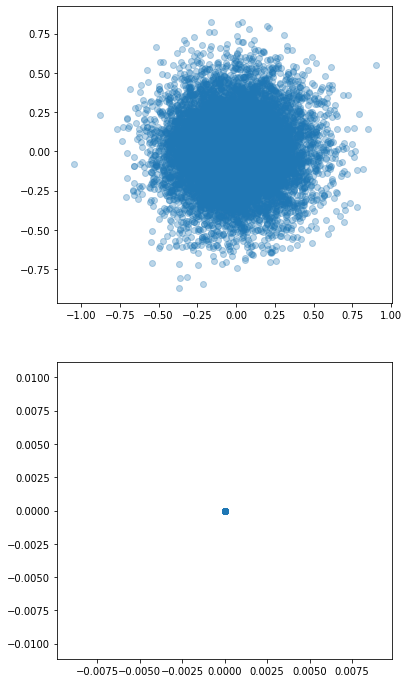

In [39]:
fig, ax = plt.subplots(K+1,1,figsize=(6,6*(K+1)))
for i in range(K+1):
    ax[i].scatter(Z[i, :, 0], Z[i, :, 1], alpha=0.3)
    
plt.show()

In [60]:
lbf.plot_samples(lbf.sample_from_pz(num_samples))

NameError: name 'num_samples' is not defined

 50%|█████     | 1/2 [01:28<00:47, 47.56s/it]

Iteration 0; gradient mag: 129756.719


100%|██████████| 2/2 [02:07<00:00, 63.77s/it]


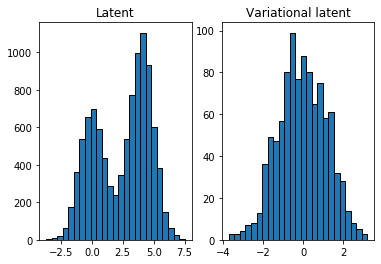

In [63]:
%lprun -f distributions.log_mvn lgm.main()

In [84]:
xx.shape

(1000, 1)

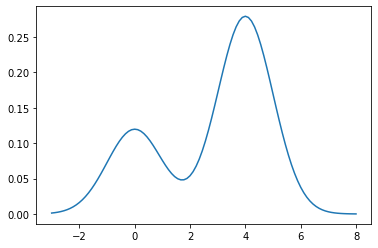

In [148]:
mus = np.array([[0], [4]])
Sigma_diags = np.array([[1], [1]])
# probs = np.array([0.3, 0.7])
pi = np.array([0.3])
xx = np.linspace(-3, 8, 100).reshape(-1, 1)
yy = distributions.prob_gm(xx, mus, Sigma_diags, pi)
plt.plot(xx, yy)
plt.show()

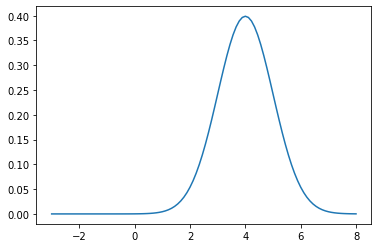

In [141]:
mu = np.array([[4]])
sigma_diag = np.array([[1]])
yy = distributions.mvn(xx, mu, sigma_diag)
plt.plot(xx, yy)
plt.show()

In [106]:
yy.shape

(1, 1)